In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file = 'lic-data-2016.csv'
nrows =-1 # to avoid loading full file each time
if nrows != -1 :
    data = pd.read_csv(file, sep=';', nrows=nrows, encoding='latin_1', dtype={'code_commune': str})
else:
     data= pd.read_csv(file, sep=';', encoding='latin_1', dtype={'code_commune': str})


In [3]:
# there is a need to add leading zero for couple of cities, in order to be able to merge wiht the geodata later on
data['code_commune'] = data['code_commune'].apply('{:0>5}'.format)

In [4]:
# Paragliding is about "vol libre" federation which is coded 258 in colmun 'fed_2016',
# according to file federation-2016.xlsx
# let's keep only that federation
data = data[data['fed_2016'].isin(['258'])]

In [5]:
data.shape

(7829, 68)

In [6]:
# load jsonfile to draw with geopandas later on
jsonfile = 'communes-20190101.json'
map_df = gpd.read_file(jsonfile)

In [7]:
map_df.columns

Index(['insee', 'nom', 'wikipedia', 'surf_ha', 'geometry'], dtype='object')

In [8]:
# need to rename the code_commune in order to merge both dataset on the common column
col_names = data.columns.values
col_names[0] = 'insee'
data.columns = col_names

In [9]:
# merging both dataset
merged = map_df.merge(data, on='insee')

In [10]:
# removing the non metropolitan cities
merged = merged[~merged.insee.str.contains('97[0-9]{3}')]#.value_counts()

In [11]:
# need to add some Region and Department info with a 3rd dataset
regdep=pd.read_csv('data.csv', sep=';', dtype={'CODGEO': str})

C:\Users\piersjea\AppData\Local\Continuum\anaconda3\envs\blog\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
regdep=regdep[['CODGEO','REG','DEP']]

In [13]:
# need to rename the CODGEO in order to merge dataset
col_names = regdep.columns.values
col_names[0] = 'insee'
regdep.columns = col_names

In [14]:
all_data = merged.merge(regdep, on='insee')

In [15]:
by_region = all_data.groupby(by='REG')

In [16]:
by_region['l_2016'].value_counts()

REG  l_2016
11   1         186
     2         100
     3          73
     4          38
     5          28
              ... 
94   6           2
     9           2
     4           1
     7           1
     24          1
Name: l_2016, Length: 317, dtype: int64

In [17]:
temp = all_data[['l_2016','REG']]
temp = temp[temp['REG'].isin(['94'])]
temp['l_2016'].sum()

148

In [18]:
24+7+4+9*2+6*2+3*4+2*17+37


148

In [20]:
by_region = all_data[['l_2016','REG']].groupby(by='REG').sum()
by_region['l_2016'].value_counts()

2367    1
7933    1
924     1
980     1
3859    1
338     1
3684    1
2349    1
769     1
1192    1
148     1
1828    1
1121    1
Name: l_2016, dtype: int64

In [21]:
by_department = all_data[['l_2016','DEP']].groupby(by='DEP').sum()

In [22]:
by_department['l_2016'].value_counts()

52      4
381     2
312     2
32      2
307     2
       ..
2130    1
1952    1
239     1
248     1
384     1
Name: l_2016, Length: 89, dtype: int64

In [23]:
# now, this is time to explore the data and extract some insights
# let's start with basic number of licensee and split by gender

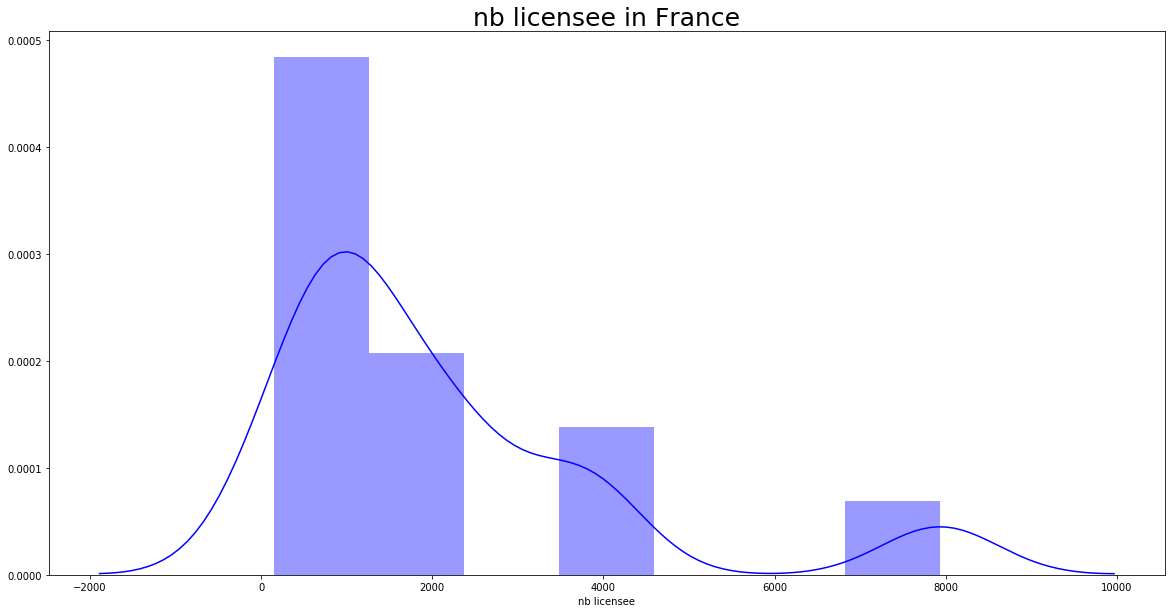

In [24]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
sns.distplot(by_region['l_2016'],ax=ax1,hist=True,color='b',axlabel='nb licensee').set_title('nb licensee in France - region',fontsize=25);

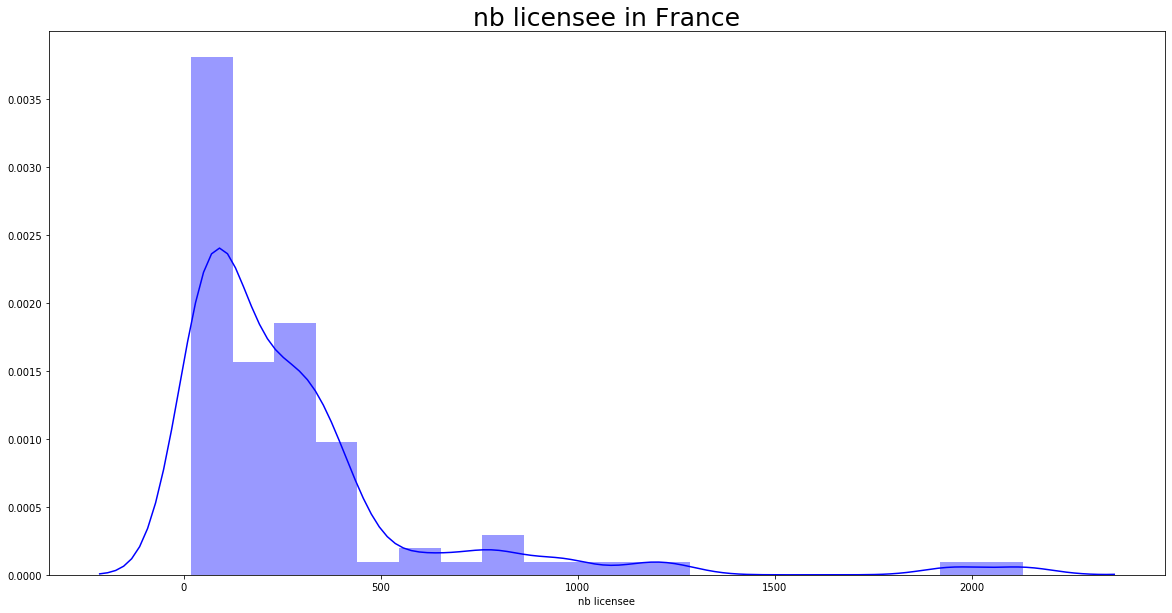

In [25]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
sns.distplot(by_department['l_2016'],ax=ax1,hist=True,color='b',axlabel='nb licensee').set_title('nb licensee in France - department',fontsize=25);

In [26]:
all_data[all_data['nom']=='Haguenau']

,insee,nom,wikipedia,surf_ha,geometry,libelle,region,fed_2016,nom_fed,l_2016,...,poph_5_9_2015,poph_10_14_2015,poph_15_19_2015,poph_20_29_2015,poph_30_44_2015,poph_45_59_2015,poph_60_74_2015,poph_75_2015,REG,DEP
7335,67180,Haguenau,fr:Haguenau,18354,"POLYGON ((7.640494199999997 48.86143209972667,...",Haguenau,Grand Est,258,Fédération française de vol libre,3,...,1013,977,1162,2705,3375,3620,2337,1002,44,67


In [27]:
# by age ?
l_0_4_2016
l_5_9_2016
l_10_14_2016
l_15_19_2016
l_20_29_2016
l_30_44_2016
l_45_59_2016
l_60_74_2016


In [92]:
by_age = all_data[['l_0_4_2016', 
                   'l_5_9_2016', 
                   'l_10_14_2016', 
                   'l_15_19_2016', 
                   'l_20_29_2016', 
                   'l_30_44_2016', 
                   'l_45_59_2016', 
                   'l_60_74_2016']].sum()

In [93]:
by_age.index

Index(['l_0_4_2016', 'l_5_9_2016', 'l_10_14_2016', 'l_15_19_2016',
       'l_20_29_2016', 'l_30_44_2016', 'l_45_59_2016', 'l_60_74_2016'],
      dtype='object')

In [96]:
new_index= {'l_0_4_2016':'0 to 4y',
            'l_5_9_2016':'5 to 9y',
            'l_10_14_2016':'10 to 14y',
            'l_15_19_2016':'15 to 19y',
            'l_20_29_2016':'20 to 29y',
            'l_30_44_2016':'30 to 44y',
            'l_45_59_2016':'45 to 59y',
            'l_60_74_2016':'60 to 74y'}


In [100]:
by_age.rename(new_index, inplace=True)

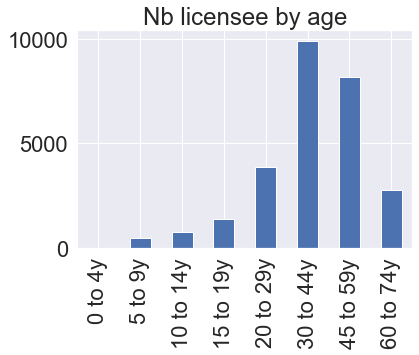

In [101]:
by_age.plot.bar(title='Nb licensee by age')

In [28]:
# top 10 cities in terms of number of licensee
top_10 = all_data.sort_values(by='l_2016', ascending=False)
top_10 = top_10[:10]

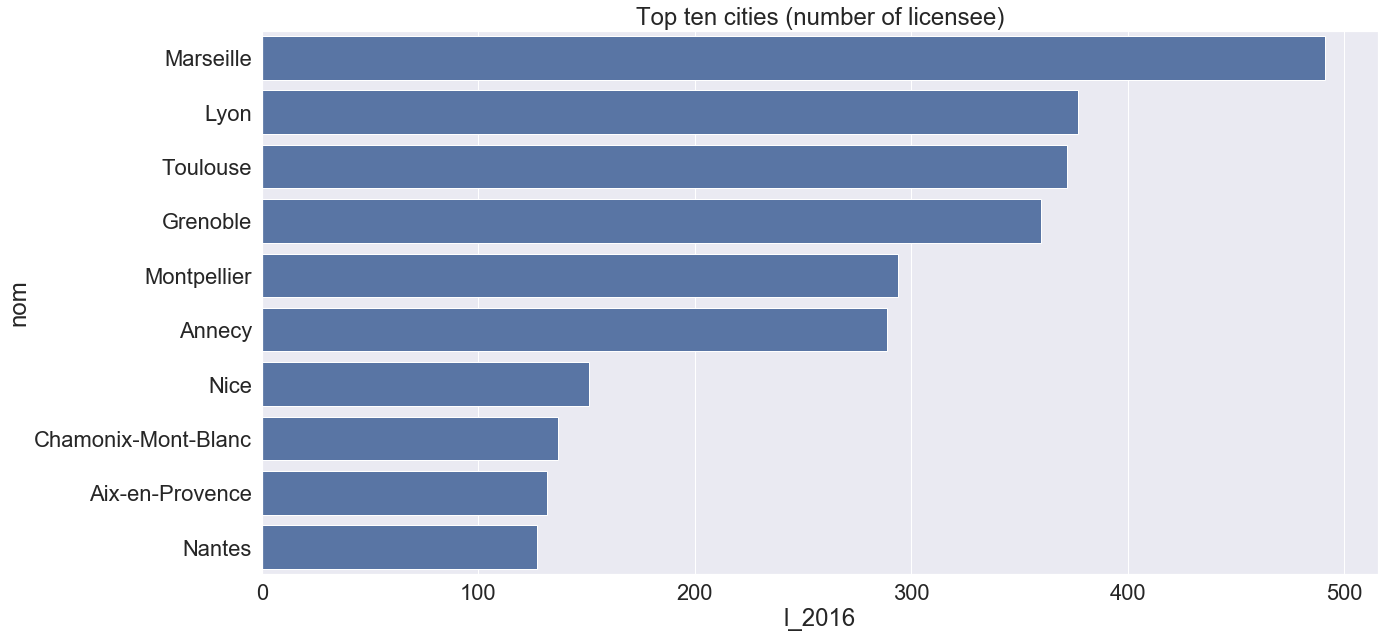

In [40]:
fig = plt.figure(figsize=(20,10))
plt.title('Top ten cities (number of licensee)')
sns.set(font_scale=2)
snsbp = sns.barplot(data=top_10,y='nom',x='l_2016',color='b',capsize=0.5);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90,minor=True);

In [47]:
# create a function to plot on the map
def plot_column(mydata, columnname, maptitle, color=plt.cm.Blues):
    vmin, vmax = int(np.min(mydata[columnname])), int(np.max(mydata[columnname]))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    mydata.plot(column=columnname, cmap=color, ax=ax, scheme='Quantiles', legend=True, k=5) #plt.cm.plasma 'OrRd'
    ax.set_title(maptitle, fontsize=1)

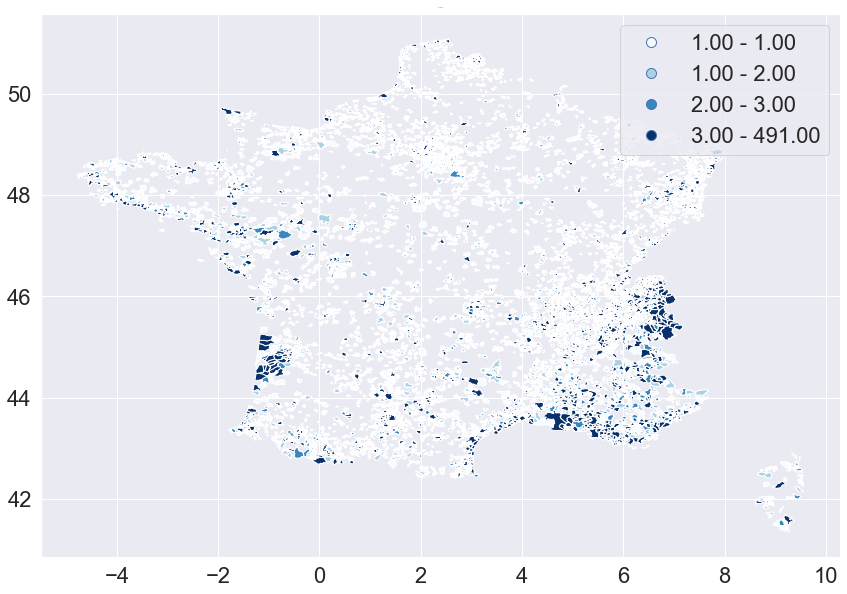

In [48]:
plot_column(all_data, 'l_2016','nb licencee')

In [ ]:
# what about 